### Installing Telethon
To interact with the Telegram API using Python, we need to install the `Telethon` library. This command installs the latest version of Telethon.

In [ ]:
pip install telethon


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 702.2/702.2 kB 11.9 MB/s eta 0:00:00
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26346 sha256=faa7e8b709e33028ae792cd16c659c0c2ae288d6bf179b48c7a87681f65eb819
  Stored in directory: /root/.cache/pip/wheels/d6/84/5f/ea6aef85a93c7e1922486369874f4740a5642d261e09c59140
Successfully built pyaes


### Connecting to Telegram with Telethon


1. **API Credentials**: You'll need to get your **API ID** and **API Hash** from [my.telegram.org](https://my.telegram.org).
2. **Phone Number**: The phone number is used to authenticate the session.
3. **Client Setup**: A session is created with the provided credentials (`api_id`, `api_hash`), and the login is initiated.
4. **Login**: When you run this, Telethon will send a verification code to your phone for authentication.

In [ ]:
from telethon.sync import TelegramClient
api_id = '21345460'
api_hash = '9932fb056eaff864c9253e832b2e2361'
phone_number = '+91 8639221522'
client = TelegramClient('session_name', api_id, api_hash)
await client.start(phone_number)


Please enter the code you received: 70049
Please enter your password: ··········
Signed in successfully as Meghana; remember to not break the ToS or you will risk an account ban!


### Scraping Messages from a Telegram Channel

1. **`iter_messages`**: This method is used to asynchronously fetch messages from a Telegram channel.
2. **`client.iter_messages(channel_url)`**: Iterates over each message in the specified channel (`@trade` in this case).
3. **Storing Messages**: All messages are collected in the `messages` list and returned for further processing.



In [ ]:
async def scrape_telegram_channel(channel_url):
    messages = []
    async for message in client.iter_messages(channel_url):
        messages.append(message.text)
    return messages
channel_url = '@trade'
messages = await scrape_telegram_channel(channel_url)
print(*messages)

🔵__Powered by __[**V3V Ventures**](https://t.me/+qu9ID0yVWhtiYmQ0) **JUST IN:** $3,700 $ETH

🔵__Powered by __[**V3V Ventures**](https://t.me/+qu9ID0yVWhtiYmQ0) **Bullish Frenzy: Is a Bubble Brewing?
**
Markets are soaring despite risks like trade wars and inflation under Trump’s administration. The S&P 500 and Russell 2000 are hitting record highs, but some experts warn this optimism may be setting the stage for a bubble.

🔵__Powered by __[**V3V Ventures**](https://t.me/+qu9ID0yVWhtiYmQ0) It's going really well 😀

🔵__Powered by __[**V3V Ventures**](https://t.me/+qu9ID0yVWhtiYmQ0) [**Read more.**](https://telegra.ph/Black-Friday-data-shows-US-shoppers-spent-108-Billion-online-11-30)

🔵__Powered by __[**V3V Ventures**](https://t.me/+qu9ID0yVWhtiYmQ0) **JPMorgan Drops $162M Lawsuit Against Tesla
**
JPMorgan Chase has dropped its $162.2 million lawsuit against Tesla over a 2014 stock warrants contract. The lawsuit, sparked by a 2018 tweet from Elon Musk, alleged breach of contract due to s

### Cleaning Scraped Messages


1. **Removing URLs**: The function uses a regular expression (`re.sub`) to remove any URLs in the text.
2. **Removing Non-Alphabetical Characters**: It removes any characters that are not letters or spaces (e.g., numbers, punctuation).
3. **Lowercase Conversion**: Converts all text to lowercase for uniformity.
4. **Removing Stopwords**: Uses the `nltk` library to remove common English stopwords (e.g., "the", "is", "in", etc.).




In [ ]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+|www\S+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        stop_words = set(stopwords.words('english'))
        text = ' '.join([word for word in text.split() if word not in stop_words])

        return text
    else:
        return ''
cleaned_messages = [clean_text(msg) for msg in messages]
for message in cleaned_messages:
    print(message)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


powered vv ventures
eth powered vv ventures
bullish frenzy bubble brewing markets soaring despite risks like trade wars inflation trumps administration sp russell hitting record highs experts warn optimism may setting stage bubble powered vv ventures
going really well powered vv ventures
read powered vv ventures
jpmorgan drops lawsuit tesla jpmorgan chase dropped million lawsuit tesla stock warrants contract lawsuit sparked tweet elon musk alleged breach contract due stock price volatility companies settled without disclosing terms powered vv ventures
stocks black friday shopping heats us stocks rose friday dow sp nasdaq seeing gains investors focused black friday sales impact president trumps tariff plans optimism grows softer restrictions china major retailers like walmart target spotlight holiday shopping kicks though consumer caution may limit growth microsoft lagged due ftc scrutiny overall market remains track strong monthly finish powered vv ventures
copyright clash canadian pub

### Saving Cleaned Messages to CSV

1. **Open CSV File**: Opens a file in write mode (`'w'`), ensuring UTF-8 encoding.
2. **Write Header**: Adds the header `['Cleaned Message']`.
3. **Write Data**: Each cleaned message is written as a row in the CSV.
4. **Confirmation**: A message is printed when the process is complete.

The cleaned messages are stored in the `cleaned_messages.csv` file.


In [ ]:
import csv
with open('cleaned_messages.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Cleaned Message'])
    for message in cleaned_messages:
        writer.writerow([message])
print("Cleaned messages saved to cleaned_messages.csv")

Cleaned messages saved to cleaned_messages.csv


### Reading Cleaned Messages from CSV

1. **Read CSV File**: `pd.read_csv('cleaned_messages.csv')` loads the CSV file into a DataFrame.
2. **Display Head**: `df.head()` displays the first 5 rows of the DataFrame.


In [101]:
df = pd.read_csv('cleaned_messages.csv')
print(df.head())

                                     Cleaned Message
0                                powered vv ventures
1                            eth powered vv ventures
2  bullish frenzy bubble brewing markets soaring ...
3              going really well powered vv ventures
4                           read powered vv ventures


### Sentiment Analysis on Cleaned Messages

1. **Sentiment Calculation**: The `TextBlob` library is used to calculate the **sentiment polarity** of each message (`get_sentiment` function). A positive polarity indicates positive sentiment, while a negative polarity indicates negative sentiment.
2. **Sentiment Category**: Based on the sentiment score:
   - **Positive** if the polarity is greater than 0
   - **Neutral** if the polarity is 0
   - **Negative** if the polarity is less than 0
3. **Apply Function**: `apply` is used to apply the sentiment calculation and categorization to the DataFrame.



In [102]:
from textblob import TextBlob
def get_sentiment(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return float('nan')
df['sentiment'] = df['Cleaned Message'].apply(get_sentiment)
df['sentiment_category'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative') if not pd.isnull(x) else float('nan')
)

print(df[['Cleaned Message', 'sentiment', 'sentiment_category']].head())

                                     Cleaned Message  sentiment  \
0                                powered vv ventures        0.0   
1                            eth powered vv ventures        0.0   
2  bullish frenzy bubble brewing markets soaring ...        0.0   
3              going really well powered vv ventures        0.2   
4                           read powered vv ventures        0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3           Positive  
4            Neutral  


### Sentiment Distribution and Percentages


1. **Count Sentiment Categories**: `df['sentiment_category'].value_counts()` counts how many occurrences there are for each sentiment category (Positive, Neutral, Negative).
2. **Calculate Percentages**: The percentage of each sentiment is calculated by dividing the counts by the total number of messages, then multiplying by 100.
3. **Display Results**: The resulting percentages are printed for each sentiment category.



In [103]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100
print(sentiment_percentages)


sentiment_category
Positive    46.786787
Neutral     36.396396
Negative    16.816817
Name: count, dtype: float64


### Visualizing Sentiment Distribution with a Pie Chart

1. **Create Pie Chart**: `plt.figure(figsize=(7, 7))` sets the size of the plot. The pie chart is created using `sentiment_percentages.plot(kind='pie')`.
2. **Formatting**: The `autopct='%1.1f%%'` argument adds percentage labels to the chart. Custom colors (`['blue', '#FFC0CB', 'red']`) are used for each sentiment category (Positive, Neutral, Negative).
3. **Title and Labels**: A title is added with `plt.title()`, and `plt.ylabel('')` removes the y-axis label.
4. **Display**: `plt.show()` displays the pie chart.


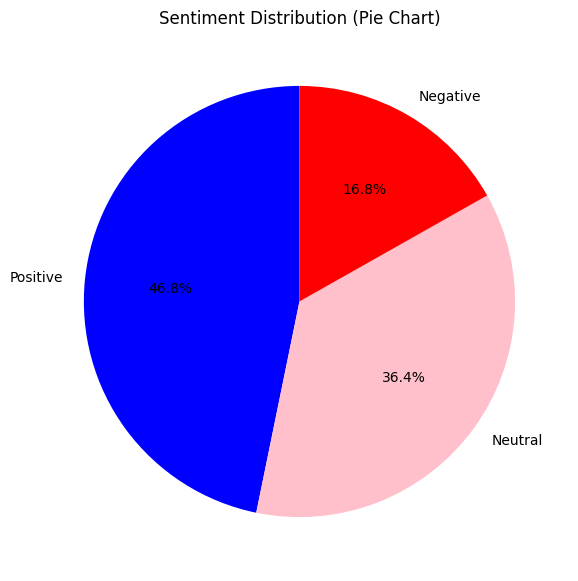

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
sentiment_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['blue', '#FFC0CB', 'red'], startangle=90)
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()


### Topic Modeling with LDA (Latent Dirichlet Allocation)
1. **Text Preprocessing**:
   - The `preprocess` function tokenizes the messages by converting them to lowercase and removing stopwords.
2. **Tokenization**: The messages are tokenized using the `apply()` method to create a list of tokens for each message.
3. **Create Dictionary and Corpus**:
   - A **dictionary** is created from the tokenized messages using `corpora.Dictionary()`.
   - The **corpus** is generated by converting each tokenized message into a bag-of-words format (`doc2bow`).
4. **Train LDA Model**: The **LDA model** is trained on the corpus to extract 2 topics with `num_topics=2` and 15 passes through the data.
5. **Assign Topics**: The topics (topic 0 and topic 1) are assigned to each message based on the highest probability.


In [105]:
import nltk
from gensim import corpora
from gensim.models import LdaModel

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def preprocess(text):
    if isinstance(text, str):
        tokens = text.lower().split()
        tokens = [word for word in tokens if word not in stop_words]
        return tokens
    else:
        return []

tokenized_messages = df['Cleaned Message'].apply(preprocess)

dictionary = corpora.Dictionary(tokenized_messages)
corpus = [dictionary.doc2bow(text) for text in tokenized_messages]
lda_model = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

df['Cleaned Message'] = df['Cleaned Message'].astype(str)

df['topic_0'] = df['Cleaned Message'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[0][1] if lda_model.get_document_topics(dictionary.doc2bow(preprocess(x))) and len(lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))) > 0 else 0)
df['topic_1'] = df['Cleaned Message'].apply(lambda x: lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))[1][1] if lda_model.get_document_topics(dictionary.doc2bow(preprocess(x))) and len(lda_model.get_document_topics(dictionary.doc2bow(preprocess(x)))) > 1 else 0)

print(df[['Cleaned Message', 'topic_0', 'topic_1']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                     Cleaned Message   topic_0   topic_1
0                                powered vv ventures  0.128423  0.871577
1                            eth powered vv ventures  0.111406  0.888586
2  bullish frenzy bubble brewing markets soaring ...  0.021716  0.978287
3              going really well powered vv ventures  0.078398  0.921590
4                           read powered vv ventures  0.102220  0.897789


### Counting Mentions of Stock-related Terms


1. **Define Keywords**: A list of stock-related terms (`stock_symbols`) is defined.
2. **Count Mentions**: The `count_mentions` function counts the occurrences of each keyword in the message.
3. **Apply Function**: `apply()` is used to apply this function to each message in the `Cleaned Message` column.
4. **Store Results**: The mention count is saved in a new column `mentions`.


In [ ]:
stock_symbols = ['stock', 'market', 'share', 'investment', 'price', 'trade', 'profit', 'loss']
def count_mentions(text, symbols):
    return sum(text.lower().count(symbol) for symbol in symbols)
df['mentions'] = df['Cleaned Message'].apply(lambda x: count_mentions(x, stock_symbols))
print(df[['Cleaned Message', 'mentions']].head())


                                     Cleaned Message  mentions
0                                powered vv ventures         0
1                            eth powered vv ventures         0
2  bullish frenzy bubble brewing markets soaring ...         2
3              going really well powered vv ventures         0
4                           read powered vv ventures         0


### Display DataFrame Columns

This code prints the names of all columns in the DataFrame.


In [ ]:
print(df.columns)

Index(['Cleaned Message', 'topic_0', 'topic_1', 'mentions', 'sentiment',
       'price_movement'],
      dtype='object')


### Creating Target Column and Selecting Features

1. **Target Column**: `price_movement` is set to 1 if sentiment > 0 and mentions > 2, otherwise -1.
2. **Features**: The selected features are sentiment, mentions, topic_0, and topic_1 for prediction.

`X` contains the features and `y` contains the target variable.


In [ ]:
df['price_movement'] = df.apply(lambda row: 1 if row['sentiment'] > 0 and row['mentions'] > 2 else -1, axis=1)
X = df[['sentiment', 'mentions', 'topic_0', 'topic_1']]
y = df['price_movement']
print(X.head())

   sentiment  mentions   topic_0   topic_1
0        0.0         0  0.153971  0.845997
1        0.0         0  0.464292  0.535748
2        0.0         2  0.019961  0.980050
3        0.2         0  0.103178  0.896858
4        0.0         0  0.115298  0.884695


### Model Training and Evaluation

1. **Train-Test Split**: The data is split into training (80%) and testing (20%) sets.
2. **Train Model**: A Logistic Regression model is trained using the training data.
3. **Make Predictions**: The model makes predictions on the test data.
4. **Evaluate**: The model’s accuracy is calculated and printed.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8820058997050148


### WordCloud Visualization

1. **Generate WordCloud**: The `WordCloud` function generates the word cloud from the cleaned text.
2. **Display WordCloud**: The word cloud is displayed using `matplotlib`, with custom settings for size and appearance.


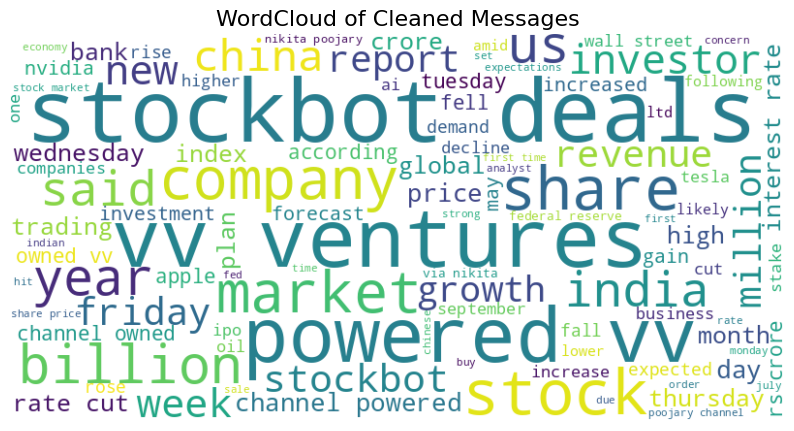

In [98]:
!pip install wordcloud -q
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cleaned_text = ' '.join(cleaned_messages)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(cleaned_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Cleaned Messages", fontsize=16)
plt.show()



### Predicting Price Movement Based on Sentiment


1. **Positive Sentiment**: If sentiment is greater than 0, the predicted price movement is 1 (indicating an upward price movement).
2. **Negative Sentiment**: If sentiment is less than or equal to 0, the predicted price movement is -1 (indicating a downward price movement).



In [ ]:
df['predicted_price_movement'] = df['sentiment'].apply(lambda x: 1 if x > 0 else -1)

In [ ]:
X = df[['sentiment', 'mentions', 'topic_0', 'topic_1']]
y = df['price_movement']


### Splitting Data into Training and Testing Sets

1. **Training Set**: 80% of the data will be used for training.
2. **Testing Set**: 20% of the data will be used for testing.
3. **Random State**: The `random_state=42` ensures that the split is reproducible.




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Handling Missing Values and Training the Model

1. **Remove Missing Data**: Drops rows with missing values from both training and test sets.
2. **Train Model**: Initializes and trains a Logistic Regression model with `max_iter=1000`.


In [119]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_test = X_test.dropna()
y_test = y_test[X_test.index]
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [118]:
y_pred = model.predict(X_test)


### Visualizing Actual vs Predicted Price Movement


1. **Prepare Data**: The `Actual` and `Predicted` values are stored in a DataFrame.
2. **Plot Data**: A line plot is created with actual values in blue and predicted values in red (dashed).
3. **Plot Customization**: The plot includes a title, labels, and a grid for easy interpretation.



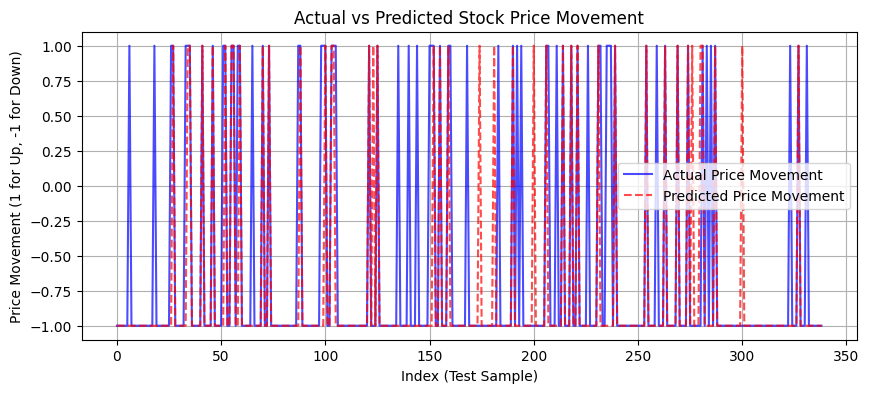

In [107]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

actual = y_test.values
predicted = y_pred

results_df = pd.DataFrame({'Actual': actual, 'Predicted': predicted})
results_df['Index'] = np.arange(len(results_df))

plt.figure(figsize=(10, 4))
plt.plot(results_df['Index'], results_df['Actual'], label='Actual Price Movement', color='blue', alpha=0.7)
plt.plot(results_df['Index'], results_df['Predicted'], label='Predicted Price Movement', color='red', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Stock Price Movement')
plt.xlabel('Index (Test Sample)')
plt.ylabel('Price Movement (1 for Up, -1 for Down)')
plt.legend()
plt.grid(True)
plt.show()


### Correct vs Incorrect Predictions

1. **Scatter Plot**: Displays green dots for correct predictions and red dots for incorrect ones.
2. **Line Plot**: Shows actual vs predicted price movements with blue and red lines.




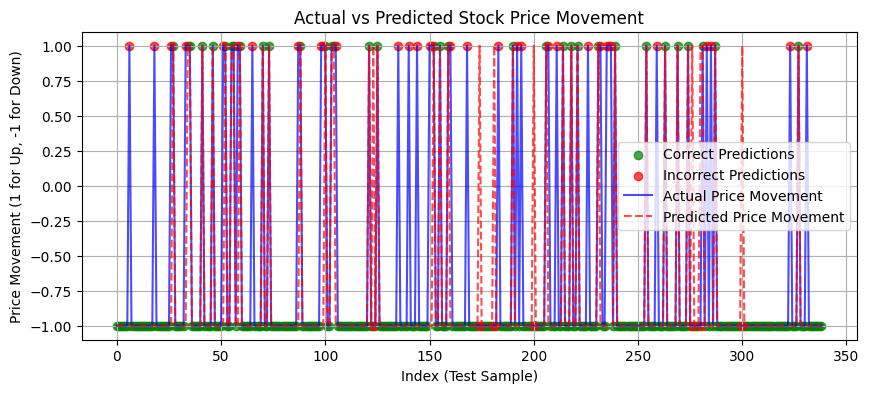

In [120]:
plt.figure(figsize=(10, 4))

correct_preds = results_df[results_df['Actual'] == results_df['Predicted']]
incorrect_preds = results_df[results_df['Actual'] != results_df['Predicted']]

plt.scatter(correct_preds['Index'], correct_preds['Actual'], color='green', label='Correct Predictions', alpha=0.7)
plt.scatter(incorrect_preds['Index'], incorrect_preds['Actual'], color='red', label='Incorrect Predictions', alpha=0.7)

plt.plot(results_df['Index'], results_df['Actual'], label='Actual Price Movement', color='blue', alpha=0.7)
plt.plot(results_df['Index'], results_df['Predicted'], label='Predicted Price Movement', color='red', linestyle='--', alpha=0.7)

plt.title('Actual vs Predicted Stock Price Movement')
plt.xlabel('Index (Test Sample)')
plt.ylabel('Price Movement (1 for Up, -1 for Down)')
plt.legend()
plt.grid(True)
plt.show()


### Model Performance Metrics

1. **Accuracy**: Proportion of correct predictions.
2. **Precision**: Ratio of correct positive predictions to total positive predictions.
3. **Recall**: Ratio of correct positive predictions to actual positives.
4. **F1 Score**: Harmonic mean of precision and recall.



In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.88
Precision: 0.83
Recall: 0.51
F1 Score: 0.63

Classification Report:
              precision    recall  f1-score   support

          -1       0.89      0.97      0.93       272
           1       0.83      0.51      0.63        67

    accuracy                           0.88       339
   macro avg       0.86      0.74      0.78       339
weighted avg       0.88      0.88      0.87       339


Confusion Matrix:
[[265   7]
 [ 33  34]]


### Hyperparameter Tuning with Random Forest

1. **Cross-Validation**: Evaluates the model using **5-fold cross-validation** for accuracy.
2. **Grid Search**: Tunes hyperparameters (`max_depth`, `min_samples_split`, `n_estimators`) using **GridSearchCV** to find the best combination for the model.



In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=50)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 150],
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score from Grid Search:", grid_search.best_score_)


Cross-validation scores: [1.         1.         0.99704142 1.         1.        ]
Mean cross-validation score: 0.9994082840236687
Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best score from Grid Search: 0.9992592592592592


In [124]:
y_pred = grid_search.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       272
           1       1.00      1.00      1.00        67

    accuracy                           1.00       339
   macro avg       1.00      1.00      1.00       339
weighted avg       1.00      1.00      1.00       339

Confusion Matrix:
 [[272   0]
 [  0  67]]


## Feature Importance Visualization
1. Feature Importances Extraction: We extract importance scores from the trained model (grid_search.best_estimator_).
2. Sorting Features: Features are sorted by importance to highlight the most influential ones.
3. Plotting: A horizontal bar plot displays the feature importance, with longer bars indicating greater importance.

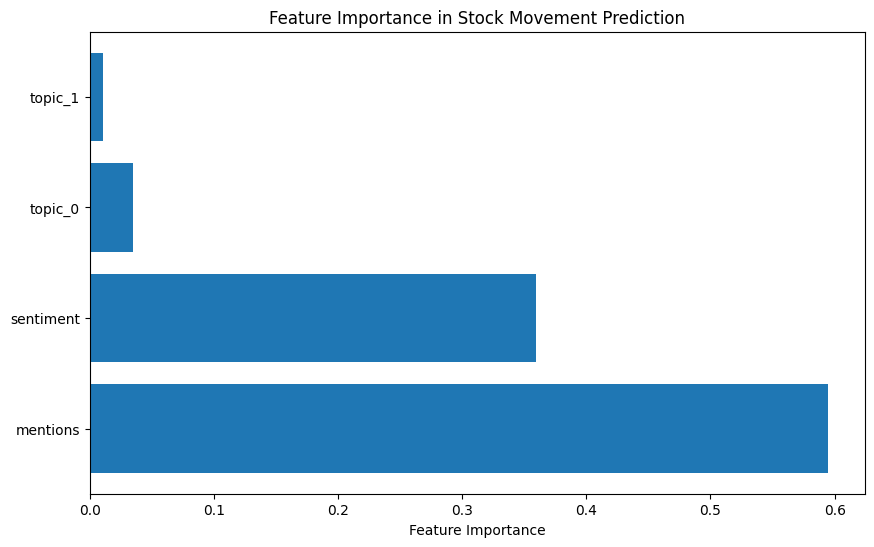

In [126]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Stock Movement Prediction")
plt.show()


## Confusion Matrix Visualization
1. Confusion Matrix: Calculated using confusion_matrix().
2. Heatmap: Displayed with seaborn, showing counts inside the cells.
3. Labels: 'Negative' and 'Positive' represent the classification categories.

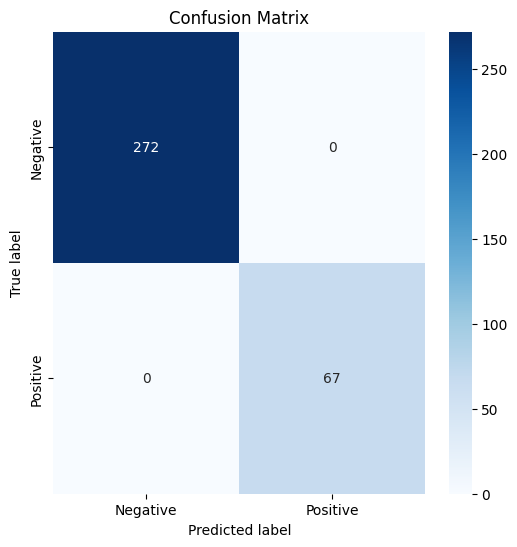

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
